In [1]:
#ch08_01_CNN_mnist.ipynb

In [2]:
#step0. CNN,Convolutional Neural Network 簡介
#
#step0.1 MLP vs. CNN
#step0.2 CNN可分為2大部分: 1.影像特徵提取 2.完全連結神經網路
#        1.影像特徵提取:卷積層1,池化層1,卷積層2,池化層2
#        2.完全連結神經網路: 平坦層(Flatten),隱藏層,輸出層

In [3]:
#step1. 資料預處理(Preprocess)
#       在MlP,我們將資料 reshape(60000,784)
#       在CNN,我們將資料 reshape(60000,28,28,1) (1,單色)

In [4]:
#step1.1 匯入所需模組
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [5]:
#step1.2 讀取 mnist 資料
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

In [6]:
#step1.3 將features(數字影像特徵值) 轉換為4維矩陣,並轉型為 'float32'
x_Train.shape #原資料 shape (60000,28,28)

(60000, 28, 28)

In [7]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [8]:
x_Train4D.shape

(60000, 28, 28, 1)

In [9]:
#step1.4 將features(數字影像特徵值)標準化
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

In [10]:
#step1.5 將label(數字的真實值)以Onehot encoding 轉換, np_utils.to_categorical()
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [11]:
#============================================================================
#step2. 建立模型, CNN, Convolutional Neural Network

In [12]:
#step2.1 匯入所需模組
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
     #在這個影像處理的例子,我們使用的是 keras的 Conv2D做卷積層(對應 tensorflow tf.nn.conv2d),
     #                                       MaxPooling2D做池化層 (對應 tensorflow tf.layers.MaxPooling2D)

In [13]:
#step2.2 建立keras.Sequential model 'cnn_model'
cnn_model=Sequential()

In [14]:
#step2.3 建立卷積層1 與 池化層1
#step2.3.a 建立卷積層1, 以Conv2D()
cnn_model.add(Conv2D(filters=16,      #建立16個濾鏡 filter weight
             kernel_size=(5,5),       #濾鏡大小 5x5
             padding='same',          #設定卷積運算,產生的卷積影像大小不變
             input_shape=(28,28,1),   #影像大小 28x28, 第三個維度 1 -->灰色單階
             activation='relu'))      #activation function 'relu'

In [15]:
#step2.3.b 建立池化層1, 以MaxPooling2D()
cnn_model.add(MaxPooling2D(pool_size=(2,2))) #第一次縮減取樣, 將16個 28x28 --> 16個 14x14

In [16]:
#step2.4 建立卷積層2 與 池化層2
#step2.4.a 建立卷積層2, 以Conv2D(), 將原本16個影像,轉換為36個影像,影像大小維持 14x14 (2.3.b)
cnn_model.add(Conv2D(filters=36,
                     kernel_size=(5,5),
                     padding='same',
                     activation='relu'))

In [17]:
#step2.4.b 建立池化層2, 以MaxPooling2D(), 參數 pool_size=(2,2)
#          執行第二次縮減取樣, 將36個 14x14 --> 36個 7x7
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
#step2.4.c 加入 Dropout 避免 overfitting
cnn_model.add(Dropout(0.25)) #0.25, 每次訓練迭代時,會隨機地在神經網路中放棄25%的神經元,以避免overfitting

In [19]:
#==================================================================================================
#以上,建立        1.影像特徵提取:卷積層1,池化層1,卷積層2,池化層2
#接下來,我們建立   2.完全連結神經網路: 平坦層(Flatten),隱藏層,輸出層

In [20]:
#step2.5 建立完全連結神經網路: 平坦層(Flatten),隱藏層,輸出層

In [21]:
#step2.5.a 建立平坦層(Flatten)
#          之前池化層2 (36個 7x7影像),轉為 1維 36x7x7=1764個 float
#          這一層的位置就如同MLP的輸入層
cnn_model.add(Flatten())

In [23]:
#step2.5.b 建立隱藏層, 設定為 128個神經元, 以Dense() 實作, activation function 為 'relu'
#          'relu' activation function 其實是一個 Rectified Linear Units (線性整流單元)
cnn_model.add(Dense(128,activation='relu'))

In [24]:
#step2.5.c 再加一個 Dropout(0.5),防止overfitting
cnn_model.add(Dropout(0.5))

In [25]:
#setp2.5.d 最後建立一個輸出層, 10個神經元,對應0~9共10個數字, activation function為softmax()
cnn_model.add(Dense(10,activation='softmax'))

In [26]:
#step2.6 檢視 cnn_model 模型摘要
print(cnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               225920    
__________

In [27]:
#==============================================================================
#step3. 進行訓練, 以 Back Propagation algorithm

In [28]:
#step3.1 定義訓練方式, 使用 comile() function
cnn_model.compile(loss='categorical_crossentropy', #設定損失函數(loss function),使用 cross_entropy(交叉墒)
                  optimizer='adam',                #設定優化方法為 'adam'
                  metrics=['accuracy'])            #設定評估模型的方法為 'accuracy' 準確率

In [29]:
#step3.2 開始訓練
train_history=cnn_model.fit(x=x_Train4D_normalize,   #feature數字影像特徵值
                            y=y_TrainOneHot,         #label數字影像真實的值
                            validation_split=0.2,    #train:validation  80:20
                            epochs=10,               #週期為10
                            batch_size=300,          #每一批次 300筆
                            verbose=2)               #verbose 層級為2

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 28s - loss: 0.4901 - acc: 0.8479 - val_loss: 0.0971 - val_acc: 0.9720
Epoch 2/10
 - 27s - loss: 0.1410 - acc: 0.9586 - val_loss: 0.0636 - val_acc: 0.9802
Epoch 3/10
 - 27s - loss: 0.1021 - acc: 0.9696 - val_loss: 0.0514 - val_acc: 0.9843
Epoch 4/10
 - 27s - loss: 0.0845 - acc: 0.9752 - val_loss: 0.0465 - val_acc: 0.9854
Epoch 5/10
 - 27s - loss: 0.0721 - acc: 0.9777 - val_loss: 0.0399 - val_acc: 0.9879
Epoch 6/10
 - 27s - loss: 0.0641 - acc: 0.9809 - val_loss: 0.0396 - val_acc: 0.9883
Epoch 7/10
 - 27s - loss: 0.0572 - acc: 0.9826 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 8/10
 - 27s - loss: 0.0512 - acc: 0.9843 - val_loss: 0.0334 - val_acc: 0.9905
Epoch 9/10
 - 27s - loss: 0.0445 - acc: 0.9869 - val_loss: 0.0346 - val_acc: 0.9904
Epoch 10/10
 - 27s - loss: 0.0423 - acc: 0.9871 - val_loss: 0.0357 - val_acc: 0.9900


In [30]:
#step3.3 顯示(繪圖)訓練過程
#        讀取 train_history 中 loss 與 accuracy, 繪圖
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):  #define a function 'show_train_history'
    plt.plot(train_history.history[train])              #train_history.history 是一個 dict
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

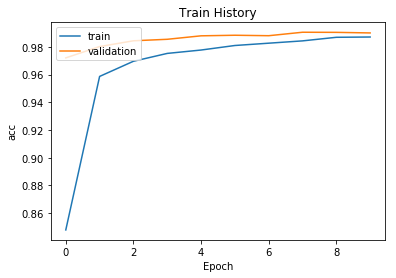

In [31]:
#step3.4 畫出 accuracy 執行結果, 使用 show_train_history
%matplotlib inline
show_train_history(train_history,'acc','val_acc')

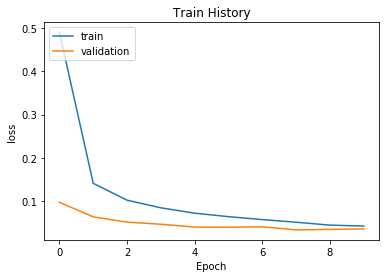

In [32]:
#step3.5 畫出 loss 誤差值
show_train_history(train_history,'loss','val_loss')

In [33]:
#step4 評估模型準確率, 使用獨立的test資料集 (10000筆)
score=cnn_model.evaluate(x_Test4D_normalize,y_TestOneHot)
score[1]

10000/10000 [==============================] - 2s 233us/step


0.99009999999999998

In [34]:
#step5 執行預測
#step5.1 以訓練完的模型 (accuracy=0.99)執行預測
prediction=cnn_model.predict_classes(x_Test4D_normalize)

In [35]:
#step5.2 檢視預測結果
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [36]:
#step5.3 顯示預測結果
#step5.3.a 建立看多筆資料函數 plot_images_labels_prediction()
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf() 
    fig.set_size_inches(12,14)      #設定顯示圖形為12"x14" 
    if num>25: num=25               #如果顯示筆數大於25,就設定為25
    for i in range(0,num):          #畫出num個數字圖形
        ax=plt.subplot(5,5,1+i)     #subplot(nrows, ncols, plot_number), plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols.
        ax.imshow(images[idx], cmap='binary') #show 第 [idx] 個 images, colormap='binary'
        title="label="+str(labels[idx])       #此一subplot抬頭為對應的label值
        if len(prediction)>0:                      #如果呼叫此函數時,有給定預測值prediction (a list)
            title+=",predit="+str(prediction[idx]) #   在抬頭加上對應的預測值 prediction[idx]
        
        ax.set_title(title,fontsize=10)  #設定subplot ax 的 title
        ax.set_xticks([]);ax.set_yticks([]) #set_xticks(ticks, minor=False), Set the x ticks with list of ticks, 此處[]為不設定刻度
        idx+=1
    plt.show()  

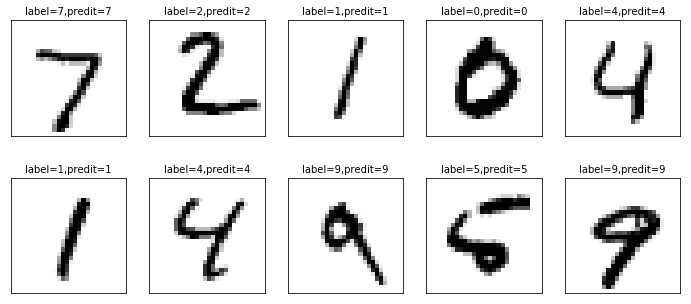

In [37]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0,num=10)

In [38]:
#step6. 顯示混淆矩陣 (confusion matrix)

In [39]:
#step6.1 使用 pandas crosstab 建立 confusion matrix
import pandas as pd

In [40]:
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,2,3,1023,0,1,0,0,3,0,0
3,0,0,0,1004,0,2,0,2,2,0
4,0,0,0,0,976,0,1,1,1,3
5,1,0,0,6,0,880,2,1,0,2
6,5,2,0,1,1,1,947,0,1,0
7,0,2,1,2,0,0,0,1022,1,0
8,4,1,3,2,1,1,0,2,955,5
